In [6]:
import pandas as pd
import datetime
#import calendar
import numpy as np
#from copy import deepcopy as dc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [26]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1611uD9STG_sA0dKmDmFI1styEwgXjEd3',
                                    dest_path='./2022-02-03.zip',
                                    unzip=True)

Unzipping...Done.


In [27]:
itog = pd.read_csv('./2022-02-03.csv')
itog.set_index('data', inplace=True)        
itog.head()

,Переток 1-4 АТ ПС 500 кВ Камала-1,Переток 1АТ Братской ГЭС,"Переток 1АТ, 2АТ Братской ГЭС (ремонтное)",Переток 2АТ Братской ГЭС,Переток 3 АТ,Переток 4АТ ТУГРЭС,Переток 5АТ ТУГРЭС,Переток Абакан - Сора,Переток Абакано-Черногорский узел (в узел),Переток Абакано-Черногорский узел (из узла),...,Линии в ремонте Кузбасс - Запад,Линии в ремонте Камала - Красноярская на запад,Линии в ремонте Усть-Илим - Братск,Линии в ремонте Назаровское на запад,Линии в ремонте Красноярская ГЭС - Назаровская ГРЭС на запад,Линии в ремонте Красноярск - Запад,Линии в ремонте Выдача мощности Саяно-Шушенской ГЭС,"Линии в ремонте Красноярск, Хакасия - Запад","Линии в ремонте БПП, Озерная - Тайшет+АК","Линии в ремонте Красноярск, Кузбасс - Запад"
data,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,-0.078936,-0.093393,NaN,0.144411,0.804252,NaN,NaN,NaN,0.037988,-0.037988,...,0,0,0,0,0,0,0,0,0,0
2021-01-01 01:00:00,-0.081451,-0.089295,NaN,0.147093,0.805833,NaN,NaN,NaN,0.035170,-0.035170,...,0,0,0,0,0,0,0,0,0,0
2021-01-01 02:00:00,-0.079966,-0.084226,NaN,0.151056,0.799270,NaN,NaN,NaN,0.037325,-0.037325,...,0,0,0,0,0,0,0,0,0,0
2021-01-01 03:00:00,-0.076000,-0.075338,NaN,0.157883,0.798302,NaN,NaN,NaN,0.037847,-0.037847,...,0,0,0,0,0,0,0,0,0,0
2021-01-01 04:00:00,-0.060330,-0.074432,NaN,0.156652,0.836722,NaN,NaN,NaN,0.039337,-0.039337,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#Добавим фичи времени
itog['Год'] = itog.index.astype(str).str[:4].astype(int)
itog['Месяц'] = itog.index.astype(str).str[5:7].astype(int)
itog['День'] = itog.index.astype(str).str[8:10].astype(int)
itog['Час'] = itog.index.astype(str).str[11:13].astype(int)

In [29]:
#Сфомируем колонки для удобства работы с данными
ges_col = ['Богучанская ГЭС', 'Братская ГЭС', 'Иркутская ГЭС', 'Красноярская ГЭС', 'Майнская ГЭС',
           'Мамаканская ГЭС', 'Новосибирская ГЭС', 'Саяно-Шушенская ГЭС', 'Усть-Илимская ГЭС']
macro_col = ['Выработка ЭЭ', 'Выработка ТЭС', 'Выработка ГЭС', 'Выработка ВИЭ',
             'Потребление ЭЭ', 'Температура']

yzl_col, per_col, mdp_col, zap_col, rem_col, lin_col  = [[i for i in itog.columns if y in i]
                                                         for y in ['Узел ', 'Переток ', 'МДП ', 'Запирания ', 'Ремонт ', 'Линии в ремонте ']]

date_col = ['Год', 'Месяц', 'День', 'Час']

## Коэффициенты прогнозируются относительно узла Барнаульская-500 (узел Барнаульская-500 является основным транзитным, так как это географически самый крупный узел рядом с европейской частью России, где цена на электроэнергию выше, чем в Сибири, что в значительной мере определяет цену также в самой Сибири), поэтому посмотрим на распеределение цены этого узла.

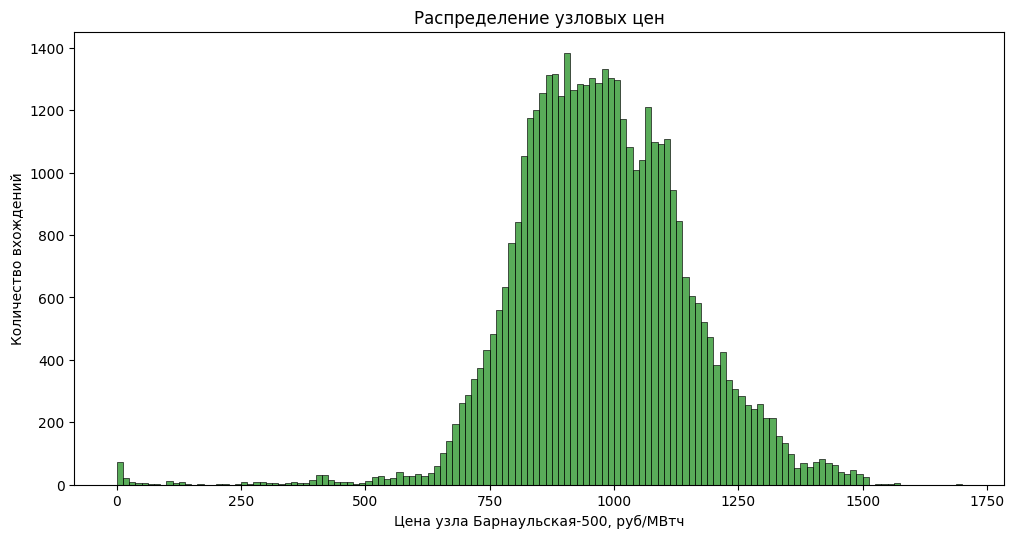

In [31]:
fig, axes = plt.subplots(figsize=(12,6), dpi=100)
g = sns.histplot(itog['Барнаульская-500'], color='Green', alpha=0.65)
plt.title('Распределение узловых цен')
g.set_xlabel('Цена узла Барнаульская-500, руб/МВтч')
g.set_ylabel('Количество вхождений')
plt.show()

Данные необходимо очистить от выбросов. Они могут быть обусловлены нарушениями работы энергосистемы или ошибками планирования режимов. Это случается крайне редко, поэтому уберем их из набора данных.

In [7]:
Q25 = itog['Барнаульская-500'].quantile(0.25)
Q75 = itog['Барнаульская-500'].quantile(0.75)
Q = Q75 - Q25
Qv = Q75+Q*1.5
Qn = Q25-Q*1.5

itog = itog.loc[(itog['Барнаульская-500']<Qv) &
                (itog['Барнаульская-500']>Qn)]

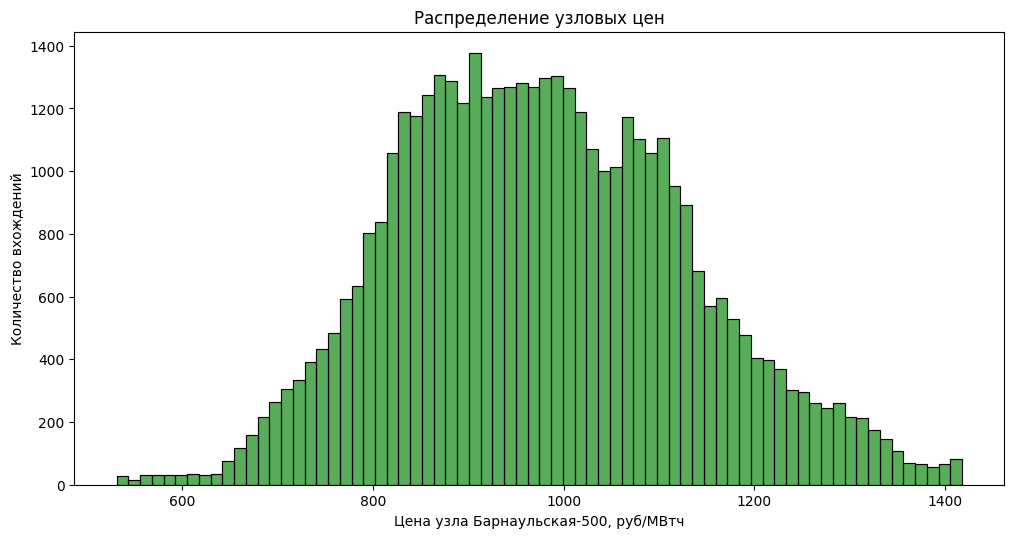

In [8]:
fig, axes = plt.subplots(figsize=(12,6), dpi=100)
g = sns.histplot(itog['Барнаульская-500'], color='Green', alpha=0.65)
plt.title('Распределение узловых цен')
g.set_xlabel('Цена узла Барнаульская-500, руб/МВтч')
g.set_ylabel('Количество вхождений')
plt.show()

In [9]:
#Посмотрим есть ли пропуски у целевой функции
itog[yzl_col].isna().sum()

Узел 283        0
Узел 284        0
Узел 285    27462
Узел 286    27462
Узел 287        0
Узел 288        0
Узел 289        0
Узел 290        0
Узел 291        0
Узел 292        0
Узел 293        0
dtype: int64

In [10]:
#Уберем узлы у которых пропусков больше половины. Показатели по таким объектам лучше прогнозировать по соседним узлам.
drop_empty_yzl = np.array(yzl_col)[itog[yzl_col].isna().sum()/itog[yzl_col].count() > 1]
itog.drop(columns=drop_empty_yzl, inplace=True)

yzl_col = [i for i in yzl_col if i not in drop_empty_yzl]
drop_empty_yzl

array(['Узел 285', 'Узел 286'], dtype='<U8')

In [11]:
#Посмотрим есть ли пропуски у целевой функции
itog[yzl_col].isna().sum()

Узел 283    0
Узел 284    0
Узел 287    0
Узел 288    0
Узел 289    0
Узел 290    0
Узел 291    0
Узел 292    0
Узел 293    0
dtype: int64

## Посмотрим на распределение коэффициентов цзловых цен целевых переменных

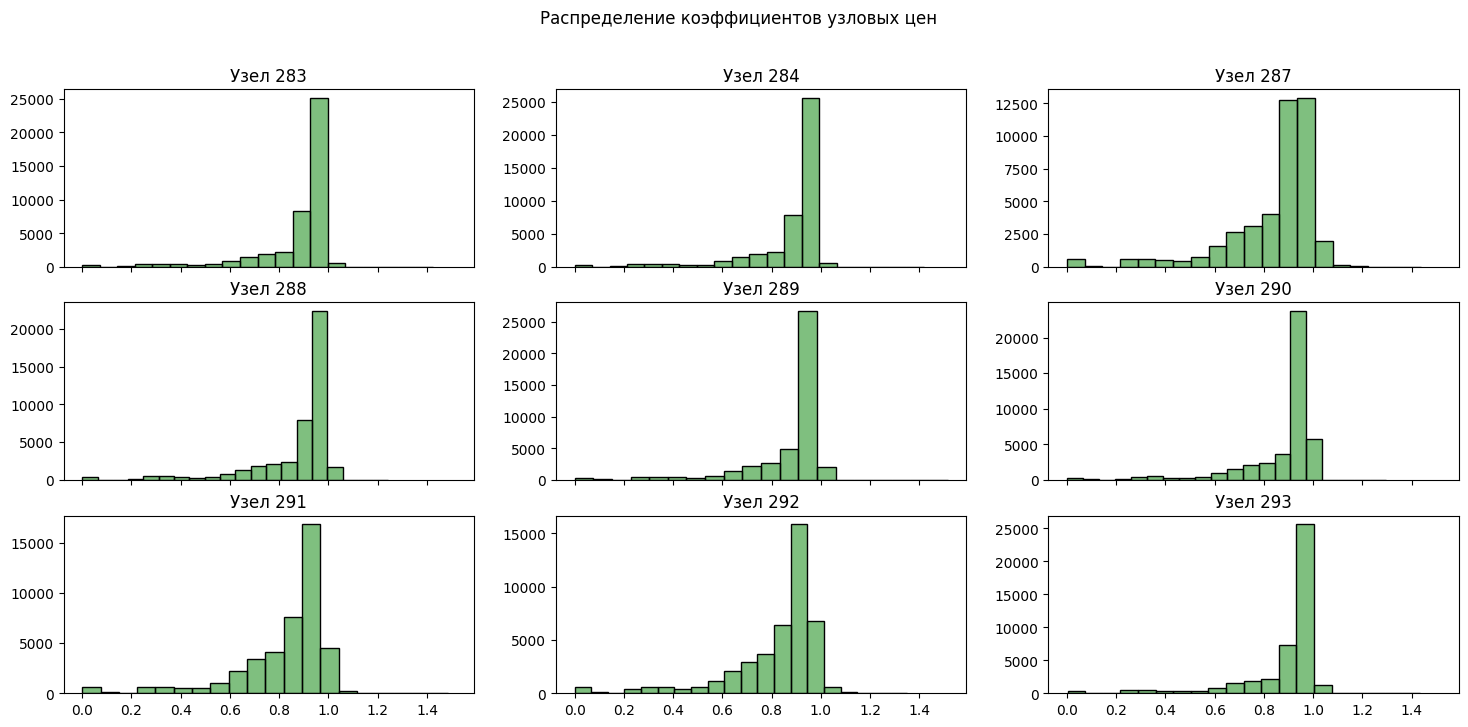

In [13]:
yzli = [i for i in itog.columns if 'Узел'in i]

fig, axes = plt.subplots(int(np.ceil(len(yzli)/3)), 3, sharex=True, figsize=(18,8), dpi=100)
fig.suptitle('Распределение коэффициентов узловых цен')
for x,i in enumerate(yzli):
    g = sns.histplot(itog[i], bins=20, ax=axes[x//3, x%3], color='Green', alpha=0.5)
    g.set_title(i)
    g.set_xlabel('')
    g.set_ylabel('')
plt.show()

**Нормальными можно считать значения в интервале 0,7 - 1,1**

Пока не будем убирать выбросы, например, 0 значения, так как они могут быть обусловлены показателями энергосистемы Сибири в конкретный час.

In [14]:
itog[macro_col+date_col].isna().sum()
#По макропараметрам пропусков нет

Выработка ЭЭ      0
Выработка ТЭС     0
Выработка ГЭС     0
Выработка ВИЭ     0
Потребление ЭЭ    0
Температура       0
Год               0
Месяц             0
День              0
Час               0
dtype: int64

In [15]:
corr_yzl = itog[yzl_col+macro_col+date_col].corr(method='spearman').loc[:, yzl_col].drop(index=yzl_col)

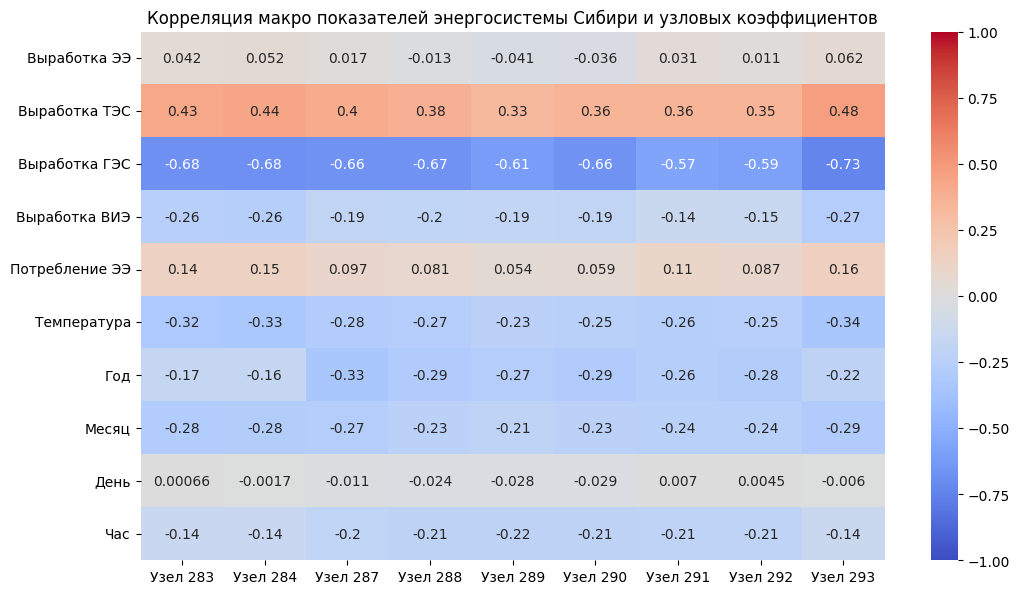

In [16]:
fig, axes = plt.subplots(figsize=(12,7), dpi=100)
sns.heatmap(corr_yzl, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2g')
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Корреляция макро показателей энергосистемы Сибири и узловых коэффициентов')
plt.show()

**Посмотрим на попарную корреляцию признаков у которых наибольшая корреляция с целевыми переменными.**

In [17]:
top_macro_corr = abs(corr_yzl.mean(1)).sort_values(ascending=False)[:5].index
top_macro_corr

Index(['Выработка ГЭС', 'Выработка ТЭС', 'Температура', 'Месяц', 'Год'], dtype='object')

In [18]:
corr_pair_macro = itog[top_macro_corr].corr(method='spearman')

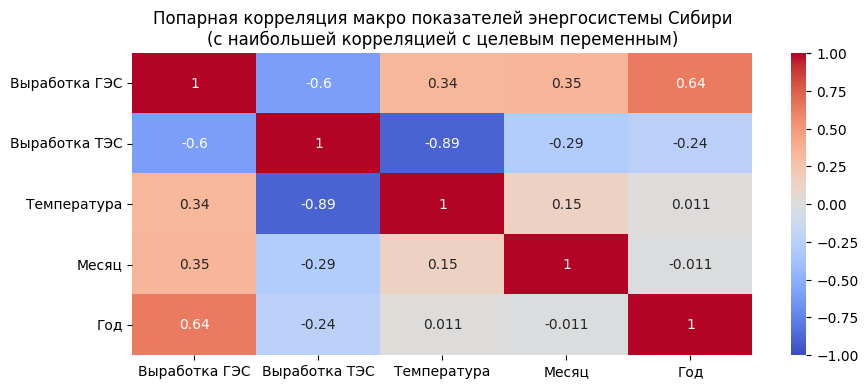

In [20]:
fig, axes = plt.subplots(figsize=(10,4), dpi=100)
sns.heatmap(corr_pair_macro, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2g')
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Попарная корреляция макро показателей энергосистемы Сибири\n(с наибольшей корреляцией c целевым переменным)')
plt.show()

Из-за высокой парной корреляции с показателем ГЭС отбросим Выработку ТЭС (выработка тепловых станций конкурирует с выработкой гидроэлектростанций, поэтому показатели сильно взаимосвязаны). Также отбросим фичу год: высокая взаимная корреляция объясняется тем, что быработка гидроэлектростанция напрямую зависит от приточности рек, так называемой водности, что определяется годом.

В результате из макропоказателей останется: Выработка ГЭС, Месяц, Температура.

Рассмотрим более подробно основной показатель: гидроэлеткростанции.

In [21]:
top_macro_col = ['Выработка ГЭС', 'Месяц', 'Температура']

In [59]:
ges_sort = itog[ges_col].median().sort_values()
ges_sort.index.to_list()

['Мамаканская ГЭС',
 'Майнская ГЭС',
 'Новосибирская ГЭС',
 'Иркутская ГЭС',
 'Богучанская ГЭС',
 'Усть-Илимская ГЭС',
 'Братская ГЭС',
 'Красноярская ГЭС',
 'Саяно-Шушенская ГЭС']

In [60]:
corr_ges = itog[yzl_col+ges_sort.index.to_list()].corr(method='spearman').loc[:, yzl_col].drop(index=yzl_col)

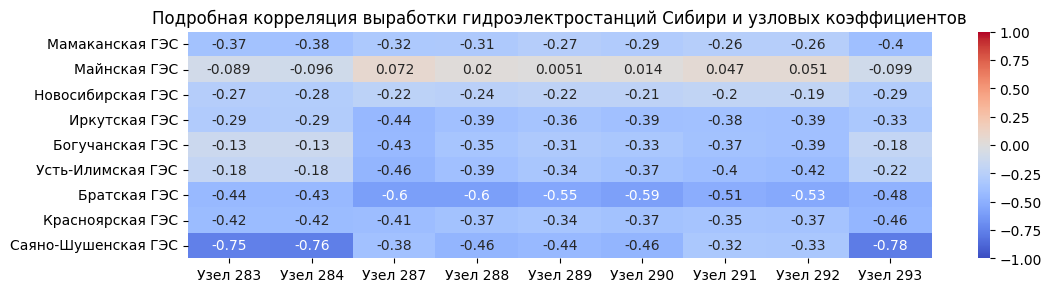

In [71]:
fig, axes = plt.subplots(figsize=(12,3), dpi=100)
sns.heatmap(corr_ges, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2g')
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Подробная корреляция выработки гидроэлектростанций Сибири и узловых коэффициентов')
plt.show()

In [64]:
ges_sort

Мамаканская ГЭС        0.028000
Майнская ГЭС           0.143000
Новосибирская ГЭС      0.204000
Иркутская ГЭС          0.414000
Богучанская ГЭС        1.878000
Усть-Илимская ГЭС      2.135175
Братская ГЭС           2.375233
Красноярская ГЭС       2.400000
Саяно-Шушенская ГЭС    2.815000
dtype: float64

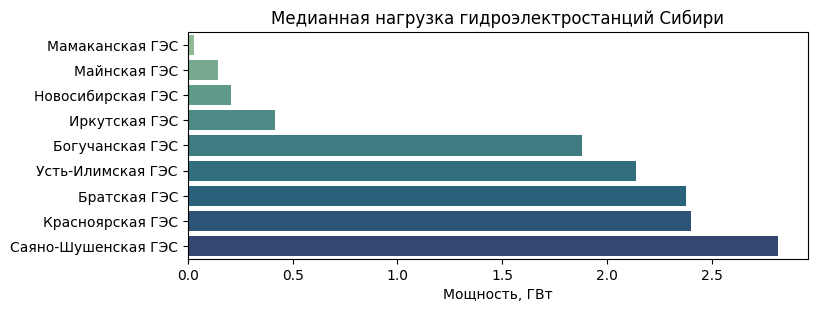

In [70]:
fig, axes = plt.subplots(figsize=(8,3), dpi=100)
sns.barplot(y=ges_sort.index, x=ges_sort.values, palette='crest')
plt.xlabel('Мощность, ГВт')
plt.title('Медианная нагрузка гидроэлектростанций Сибири')
plt.show()

Можно заметить, что разные объекты в разной степени коррелируют с целевыми переменными и, в основном, значительно. Но из показателя нагрузки видно, что часть станций производят значительно меньше электроэнергии других, поэтому оставим 5 самых больших.

'Богучанская ГЭС', 'Усть-Илимская ГЭС', 'Братская ГЭС', 'Красноярская ГЭС', 'Саяно-Шушенская ГЭС'

In [30]:
ges_top = ges_sort[-5:].index.to_list()
ges_top

['Богучанская ГЭС',
 'Усть-Илимская ГЭС',
 'Братская ГЭС',
 'Красноярская ГЭС',
 'Саяно-Шушенская ГЭС']

In [31]:
#Заменим в фичах макро общую выработку ГЭС на отдельную по станциям
top_macro_col += ges_top
top_macro_col.remove('Выработка ГЭС')
top_macro_col

['Месяц',
 'Температура',
 'Богучанская ГЭС',
 'Усть-Илимская ГЭС',
 'Братская ГЭС',
 'Красноярская ГЭС',
 'Саяно-Шушенская ГЭС']

## Оставим только самые крупные сечения, исходя из значения перетока.

Для выбора сечений, коррелирующих с целевыми переменными используем показатель перетоки по сечениям - это количество электроэнергии, которое перетекало из одного узла в другой. В дальнейшем мы не сможем использовать перетоки, так как их значение очень сложно прогнозируемомо - для этого необходимо разработать мат модель всей энергосистемы Сибири.

In [32]:
per_s = [i for i in itog.columns if 'Переток' in i]
print(f'Всего сечений в Сибири: {len(per_s)}.\nПоэтому будем анализировать самые крупные из них.')
top100_set = abs(itog[per_s]).mean().sort_values(ascending=False)[:100]

Всего сечений в Сибири: 273.
Поэтому будем анализировать самые крупные из них.


In [33]:
gran_l = (top100_set == top100_set[22])*3.5

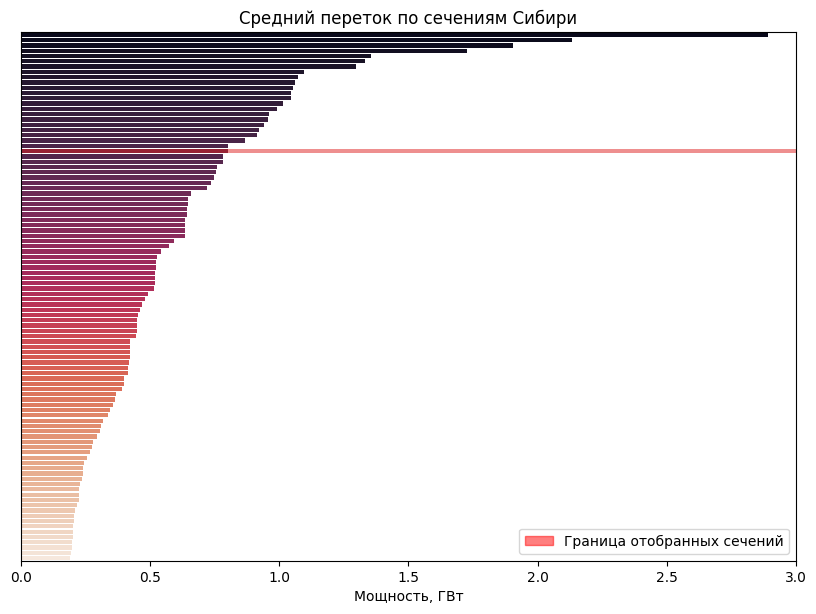

In [34]:
fig, axes = plt.subplots(figsize=(10,7), dpi=100)

g = sns.barplot(y=top100_set.index, x=top100_set.values, palette='rocket')

clrs = ['red' if x==3.5 else 'white' for x in gran_l]
h = sns.barplot(y=gran_l.index, x=gran_l.values, palette=clrs, alpha=0.5)
h.axes.yaxis.set_visible(False)

plt.xlim(0, 3)
plt.yticks(g.get_yticks(), ['' for i in g.get_yticks()]) 
plt.xlabel('Мощность, ГВт')
plt.title('Средний переток по сечениям Сибири')

bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

red_line = mpatches.Patch(color='red', label='Граница отобранных сечений', alpha=0.5)
plt.legend(handles=[red_line])

plt.show()

### Более подробно изучим 20 самых крупных сечений.

In [35]:
top20_set_col = top100_set.index[:20].to_list()
corr_set = itog[top20_set_col+yzl_col].corr(method='spearman')
corr_set.loc[:, 'Узлы энергосистемы'] = corr_set[yzl_col].mean(1)

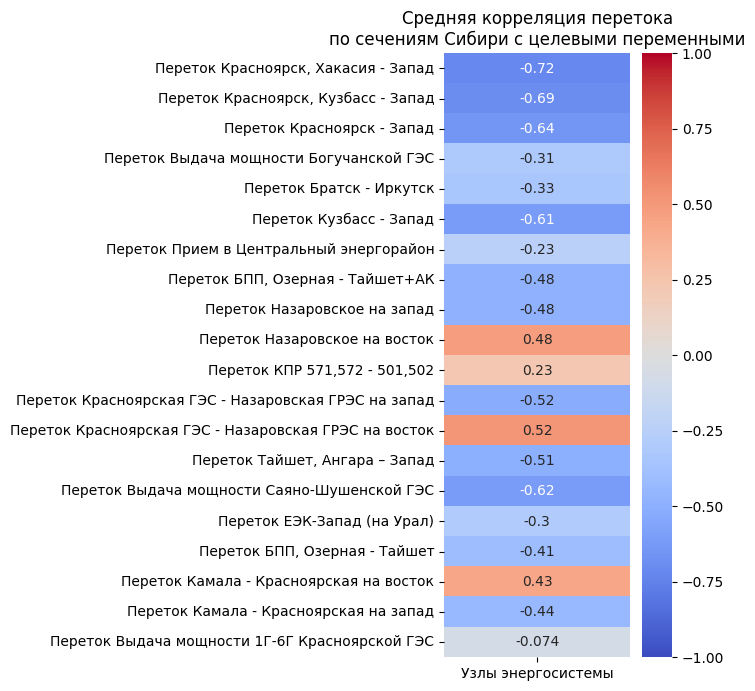

In [37]:
fig, axes = plt.subplots(figsize=(3,8), dpi=100)
g = sns.heatmap(corr_set.loc[:, ['Узлы энергосистемы']].drop(index=yzl_col) , vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2g')
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Средняя корреляция перетока\nпо сечениям Сибири с целевыми переменными')
plt.show()

#### Выберем с корреляцией больше 0.4

In [38]:
top_set_corr = corr_set.drop(index=yzl_col).loc[(abs(corr_set.loc[:, 'Узлы энергосистемы'].drop(index=yzl_col)) >= 0.4).values].index

In [39]:
zap_vost_set = [i for i in top_set_corr if (i[:-6]+'запад' in top_set_corr) or (i[:-5]+'восток' in top_set_corr)]
zap_vost_set = zap_vost_set[:4] + zap_vost_set[5:6] + zap_vost_set[4:5] # Пришлось это сделать, чтобы были пары запад-восток
zap_vost_set

['Переток Назаровское на запад',
 'Переток Назаровское на восток',
 'Переток Красноярская ГЭС - Назаровская ГРЭС на запад',
 'Переток Красноярская ГЭС - Назаровская ГРЭС на восток',
 'Переток Камала - Красноярская на запад',
 'Переток Камала - Красноярская на восток']

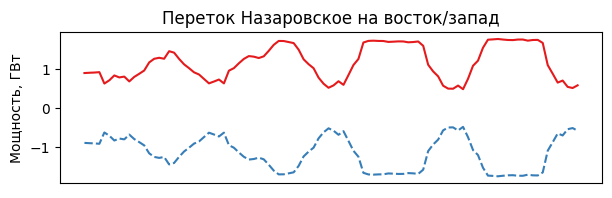

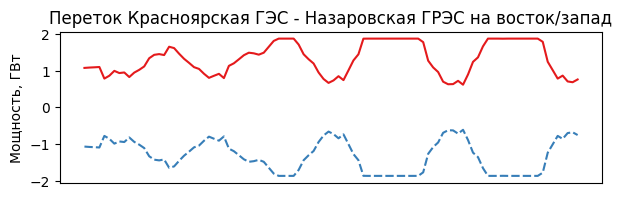

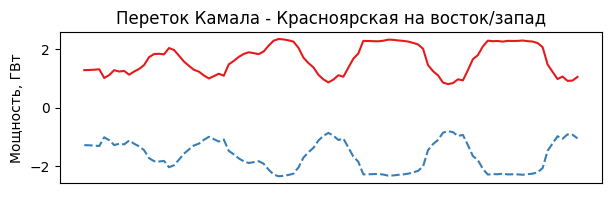

In [40]:
for c in [i*2 for i in range(int(len(zap_vost_set)/2))]:
    fig, axes = plt.subplots(figsize=(7,2), dpi=100)
    g = sns.lineplot(data=itog[zap_vost_set[c:c+2]][:100], palette='Set1', legend = False)
    g.axes.xaxis.set_visible(False)
    plt.xlabel('')
    plt.ylabel('Мощность, ГВт')
    plt.title(zap_vost_set[c].replace(' на восток', ' на восток/запад').replace(' на запад', ' на восток/запад'))
    plt.show()

In [41]:
#Оставим только те, что с направлением на запад, так как в остальном они идентичны
top_set_corr = [i for i in top_set_corr if 'восток' not in i]
top_set_corr

['Переток Красноярск, Хакасия - Запад',
 'Переток Красноярск, Кузбасс - Запад',
 'Переток Красноярск - Запад',
 'Переток Кузбасс - Запад',
 'Переток БПП, Озерная - Тайшет+АК',
 'Переток Назаровское на запад',
 'Переток Красноярская ГЭС - Назаровская ГРЭС на запад',
 'Переток Тайшет, Ангара – Запад',
 'Переток Выдача мощности Саяно-Шушенской ГЭС',
 'Переток БПП, Озерная - Тайшет',
 'Переток Камала - Красноярская на запад']

In [42]:
corr_vseh = itog[top_macro_col+top_set_corr].corr().loc[:, top_macro_col].drop(index=top_macro_col)

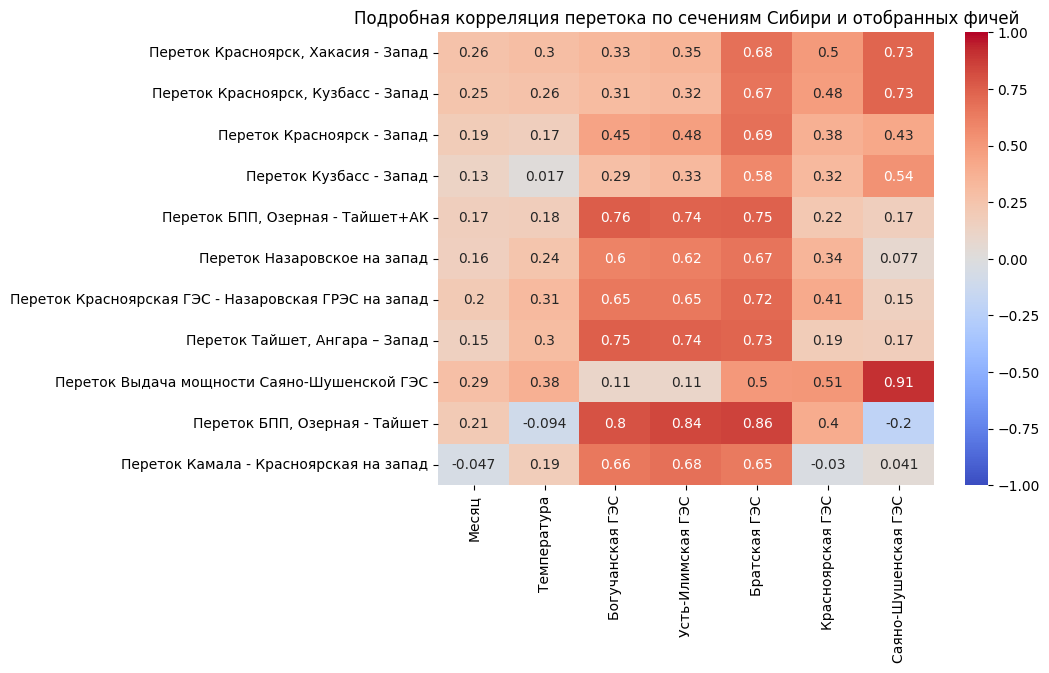

In [73]:
fig, axes = plt.subplots(figsize=(8,6), dpi=100)
g = sns.heatmap(corr_vseh, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2g')
bottom, top = axes.get_ylim()
axes.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Подробная корреляция перетока по сечениям Сибири и отобранных фичей')
plt.show()

In [46]:
cl_name_set = ['Камала - Красноярская на запад',
               'Красноярская ГЭС - Назаровская ГРЭС на запад',
               'Назаровское на запад',
               'Красноярск, Кузбасс - Запад',
               'Красноярск, Хакасия - Запад',
               'Кузбасс - Запад']

In [47]:
rem_set = ['Ремонт '+i for i in cl_name_set] + ['Запирания '+i for i in cl_name_set]

In [48]:
fit_col = top_macro_col+rem_set
itog[fit_col].isna().sum()

Месяц                                                         0
Температура                                                   0
Богучанская ГЭС                                               0
Усть-Илимская ГЭС                                             0
Братская ГЭС                                                  0
Красноярская ГЭС                                              0
Саяно-Шушенская ГЭС                                           0
Ремонт Камала - Красноярская на запад                         0
Ремонт Красноярская ГЭС - Назаровская ГРЭС на запад           0
Ремонт Назаровское на запад                                   0
Ремонт Красноярск, Кузбасс - Запад                            0
Ремонт Красноярск, Хакасия - Запад                            0
Ремонт Кузбасс - Запад                                        0
Запирания Камала - Красноярская на запад                      0
Запирания Красноярская ГЭС - Назаровская ГРЭС на запад        0
Запирания Назаровское на запад          

# Моделирование

In [414]:
import glob
import os
import requests
import time
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm

from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import torch
from torch import nn
import torch.nn.functional as F

from IPython.display import clear_output
%matplotlib inline


## Нейронка

In [510]:
#torch.cuda.set_device(device_num) #Разкоментить, если стоит видеокарта Nvidia (тогда обучение будет на gpu, а не cpu)
device_num = 0
device = f"cuda:{device_num}" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [511]:
class yzlk(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, hidden_dim2: int):
        super().__init__()
        self.n_classes = y_train.shape[1]
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, self.n_classes),
        )
        
    def forward(self, x):
        return self.net(x)

In [512]:
model = yzlk(
    input_dim=X_train.shape[1], 
    hidden_dim=20,
    hidden_dim2=12
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

model

yzlk(
  (net): Sequential(
    (0): Linear(in_features=19, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=9, bias=True)
  )
)

In [513]:
X_train, X_test, y_train, y_test = train_test_split(itog.loc[:, fit_col].fillna(0), itog.loc[:, yzl_col], test_size=0.2, random_state=1)

EPOCHS  = 10000

X_train = torch.tensor(np.array(X_train), dtype=torch.float).to(device)
y_train = torch.tensor(np.array(y_train), dtype=torch.float).to(device)
X_test = torch.tensor(np.array(X_test), dtype=torch.float).to(device)
y_test = torch.tensor(np.array(y_test), dtype=torch.float).to(device)

loss_train_list = np.zeros((EPOCHS,))
loss_test_list = np.zeros((EPOCHS,))
accuracy_train_list = np.zeros((EPOCHS,))
accuracy_test_list = np.zeros((EPOCHS,))

for epoch in tqdm(range(EPOCHS)):
    model.train()
    y_pred = model(X_train)
    loss_train = criterion(y_pred, y_train)**0.5
    loss_train_list[epoch] = loss_train.item()/y_train.mean().item()*100
    correct_train = y_pred - y_train
    accuracy_train_list[epoch] = correct_train.mean().item()
        
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        loss_test = criterion(y_pred, y_test)**0.5
        loss_test_list[epoch] = loss_test.item()/y_test.mean().item()*100
        correct_test = y_pred - y_test
        accuracy_test_list[epoch] = correct_test.mean().item()

model.eval()

  0%|          | 0/10000 [00:00<?, ?it/s]

yzlk(
  (net): Sequential(
    (0): Linear(in_features=19, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=9, bias=True)
  )
)

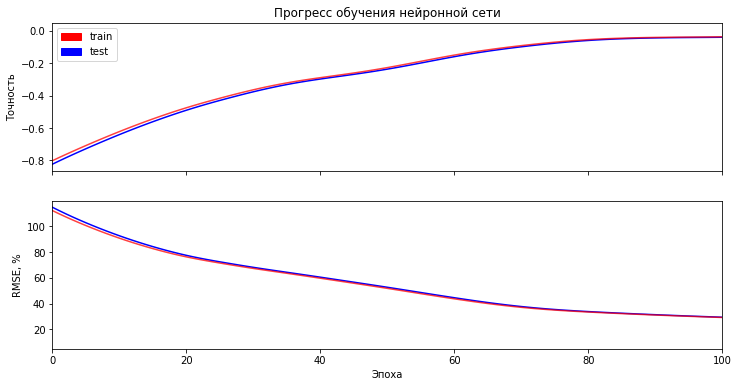

In [514]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_train_list, color='blue')
ax1.plot(accuracy_test_list, color='red', alpha=0.75)
ax1.set_ylabel("Точность")
ax2.plot(loss_train_list, color='blue')
ax2.plot(loss_test_list, color='red', alpha=0.75)
ax2.set_ylabel("RMSE, %")
ax2.set_xlabel("Эпоха")
ax2.set_xlim(0,100)
ax1.set_title('Прогресс обучения нейронной сети')

red_line = mpatches.Patch(color='red', label='train')
blue_line = mpatches.Patch(color='blue', label='test')
ax1.legend(handles=[red_line, blue_line], loc='upper left')

In [515]:
print(f'RMSE: {min(loss_test_list)} %')

RMSE: 10.68250146458089 %


In [516]:
print(f'MAE: {abs(y_pred-y_test).mean()/y_test.mean()*100} %')

MAE: 5.588636875152588 %


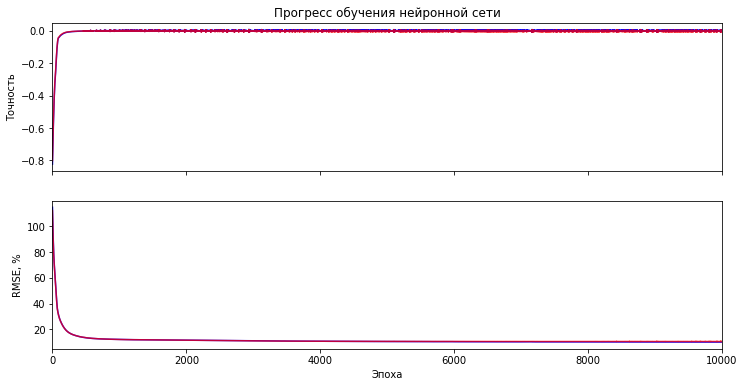

In [517]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_train_list, color='blue')
ax1.plot(accuracy_test_list, color='red', alpha=0.75)
ax1.set_ylabel("Точность")
ax2.plot(loss_train_list, color='blue')
ax2.plot(loss_test_list, color='red', alpha=0.75)
ax2.set_ylabel("RMSE, %")
ax2.set_xlabel("Эпоха")
ax2.set_xlim(0,EPOCHS)
ax1.set_title('Прогресс обучения нейронной сети')

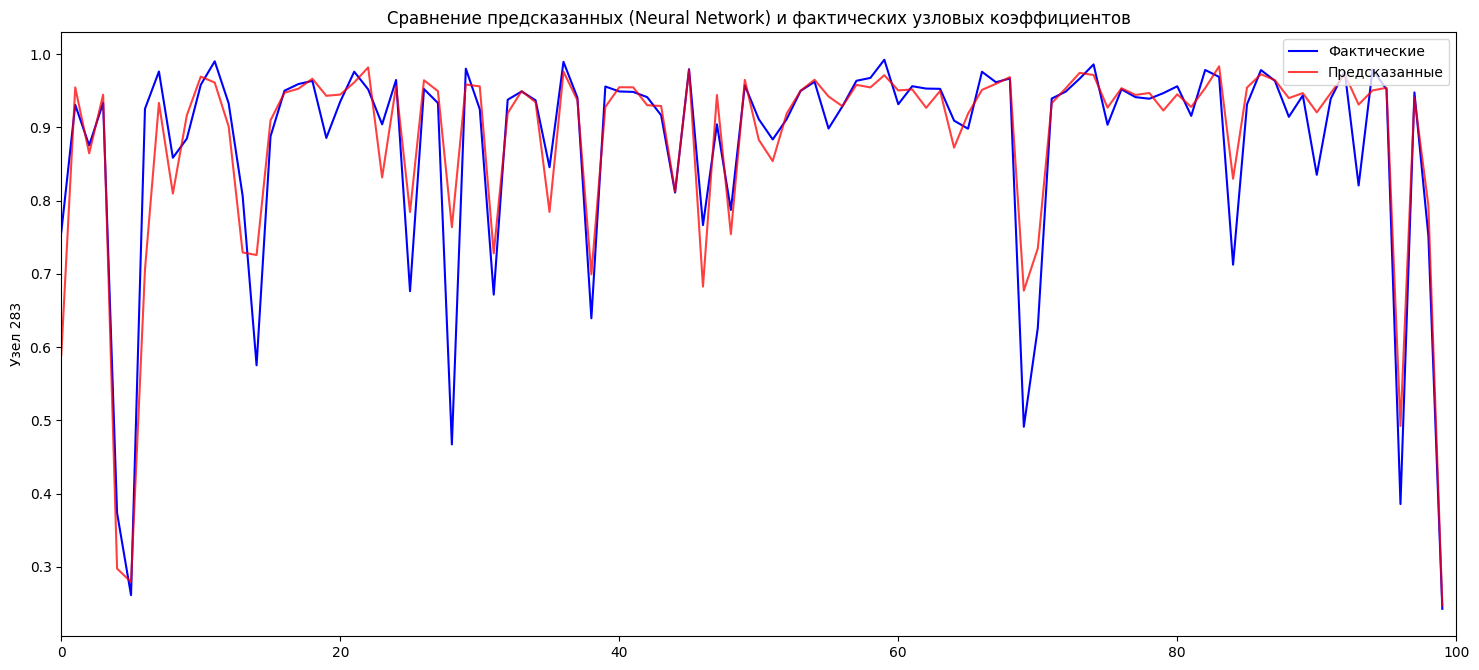

In [518]:
fig, axes = plt.subplots(figsize=(18,8), dpi=100)

g=sns.lineplot(data=pd.DataFrame(y_test.cpu().numpy())[0][:100], color='blue', label='Фактические')
sns.lineplot(data=pd.DataFrame(y_pred.cpu().numpy())[0][:100], color='Red', alpha=0.75, label='Предсказанные')

g.set_ylabel('Узел 283')
plt.legend(loc='upper right')
plt.title('Сравнение предсказанных (Neural Network) и фактических узловых коэффициентов')

plt.xlim(0,100)
plt.show()

# Гридсерч катбуста

In [419]:
def score_my(t, f):
    return print("""RMSE: %.2f%%, %.4f\nMAE: %.2f%%, %.4ff"""
                 % (mse(t, f)**0.5/t.mean()*100, mse(t, f)**0.5,
                    mae(t, f)/t.mean()*100, mae(t, f))
                 )

In [494]:
X_train, X_test, y_train, y_test = train_test_split(itog.loc[:, fit_col].fillna(0), itog.loc[:, yzl_col[0]], test_size=0.2, random_state=1)

In [495]:
model_cat = CatBoostRegressor()

cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=1)
parameters_grid = {'depth': [12, 14, 16],
                   'iterations': [200, 300, 400],
                   'learning_rate': [0.15, 0.1, 0.05],
                   'loss_function': ['RMSE']}

grid_cv = GridSearchCV(model_cat, parameters_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=4)
grid_cv.fit(X_train,
            y_train)

y_predicted = grid_cv.predict(X_test)
score_my(y_test, y_predicted)

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


0:	learn: 0.7623106	total: 36.8ms	remaining: 14.7s
1:	learn: 0.6521805	total: 65.9ms	remaining: 13.1s
2:	learn: 0.5573756	total: 80.5ms	remaining: 10.7s
3:	learn: 0.4777194	total: 108ms	remaining: 10.7s
4:	learn: 0.4098433	total: 136ms	remaining: 10.7s
5:	learn: 0.3516347	total: 144ms	remaining: 9.47s
6:	learn: 0.3036739	total: 172ms	remaining: 9.66s
7:	learn: 0.2633297	total: 200ms	remaining: 9.8s
8:	learn: 0.2285332	total: 228ms	remaining: 9.91s
9:	learn: 0.1993821	total: 243ms	remaining: 9.46s
10:	learn: 0.1750962	total: 257ms	remaining: 9.07s
11:	learn: 0.1547927	total: 284ms	remaining: 9.19s
12:	learn: 0.1391184	total: 285ms	remaining: 8.5s
13:	learn: 0.1248081	total: 313ms	remaining: 8.64s
14:	learn: 0.1130821	total: 342ms	remaining: 8.79s
15:	learn: 0.1039442	total: 370ms	remaining: 8.89s
16:	learn: 0.0964255	total: 399ms	remaining: 8.99s
17:	learn: 0.0902832	total: 427ms	remaining: 9.06s
18:	learn: 0.0854628	total: 456ms	remaining: 9.14s
19:	learn: 0.0813181	total: 484ms	remain

In [496]:
grid_cv.best_params_

{'depth': 12,
 'iterations': 400,
 'learning_rate': 0.15,
 'loss_function': 'RMSE'}

## Влияние фичей

In [498]:
model_shap = CatBoostRegressor(**grid_cv.best_params_)
model_shap.fit(X_train,
            y_train)

0:	learn: 0.7623106	total: 34.9ms	remaining: 13.9s
1:	learn: 0.6521805	total: 63.2ms	remaining: 12.6s
2:	learn: 0.5573756	total: 77.5ms	remaining: 10.3s
3:	learn: 0.4777194	total: 107ms	remaining: 10.6s
4:	learn: 0.4098433	total: 135ms	remaining: 10.6s
5:	learn: 0.3516347	total: 143ms	remaining: 9.36s
6:	learn: 0.3036739	total: 171ms	remaining: 9.6s
7:	learn: 0.2633297	total: 199ms	remaining: 9.75s
8:	learn: 0.2285332	total: 227ms	remaining: 9.85s
9:	learn: 0.1993821	total: 241ms	remaining: 9.41s
10:	learn: 0.1750962	total: 255ms	remaining: 9.03s
11:	learn: 0.1547927	total: 284ms	remaining: 9.19s
12:	learn: 0.1391184	total: 285ms	remaining: 8.49s
13:	learn: 0.1248081	total: 313ms	remaining: 8.63s
14:	learn: 0.1130821	total: 342ms	remaining: 8.79s
15:	learn: 0.1039442	total: 370ms	remaining: 8.88s
16:	learn: 0.0964255	total: 398ms	remaining: 8.96s
17:	learn: 0.0902832	total: 427ms	remaining: 9.06s
18:	learn: 0.0854628	total: 455ms	remaining: 9.12s
19:	learn: 0.0813181	total: 483ms	remai

In [499]:
explainer = shap.TreeExplainer(model_shap)
shap_values = explainer.shap_values(Pool(X_train, y_train))

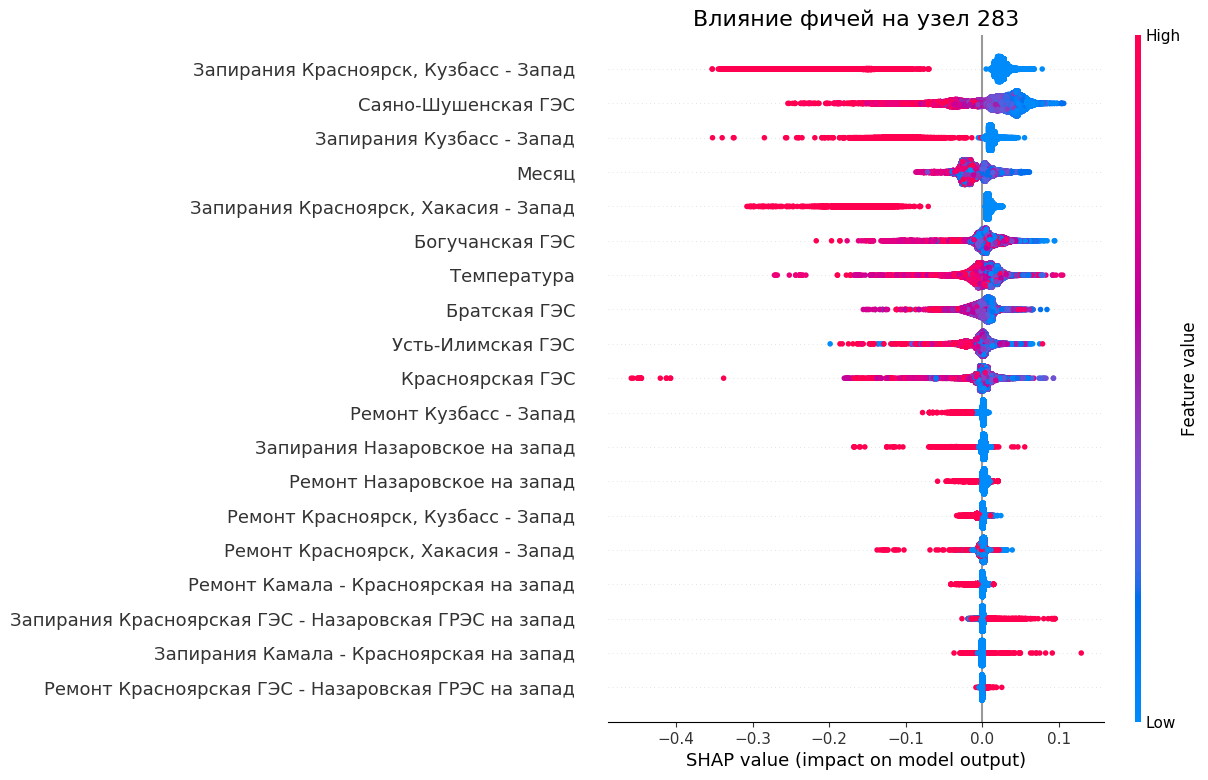

In [502]:
fig, axes = plt.subplots(figsize=(18,8), dpi=100)
shap.summary_plot(shap_values, X_train, show=False)
plt.title('Влияние фичей на узел 283', size=16)

# Катбуст

In [446]:
from sklearn.multioutput import MultiOutputRegressor

In [506]:
X_train, X_test, y_train, y_test = train_test_split(itog.loc[:, fit_col].fillna(0), itog.loc[:, yzl_col], test_size=0.2, random_state=1)

In [507]:
model_cat = CatBoostRegressor()

cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=1)
parameters_grid = {'depth': [12], 'iterations': [400], 'learning_rate': [0.15], 'loss_function': ['RMSE']}

grid_cv = MultiOutputRegressor(GridSearchCV(model_cat, parameters_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=4))
grid_cv.fit(X_train,
            y_train)


y_predicted = grid_cv.predict(X_test)

0:	learn: 0.7623106	total: 33.6ms	remaining: 13.4s
1:	learn: 0.6521805	total: 61.9ms	remaining: 12.3s
2:	learn: 0.5573756	total: 76.8ms	remaining: 10.2s
3:	learn: 0.4777194	total: 105ms	remaining: 10.4s
4:	learn: 0.4098433	total: 133ms	remaining: 10.5s
5:	learn: 0.3516347	total: 141ms	remaining: 9.24s
6:	learn: 0.3036739	total: 169ms	remaining: 9.46s
7:	learn: 0.2633297	total: 197ms	remaining: 9.64s
8:	learn: 0.2285332	total: 225ms	remaining: 9.75s
9:	learn: 0.1993821	total: 239ms	remaining: 9.3s
10:	learn: 0.1750962	total: 254ms	remaining: 8.97s
11:	learn: 0.1547927	total: 282ms	remaining: 9.1s
12:	learn: 0.1391184	total: 283ms	remaining: 8.41s
13:	learn: 0.1248081	total: 310ms	remaining: 8.56s
14:	learn: 0.1130821	total: 338ms	remaining: 8.69s
15:	learn: 0.1039442	total: 366ms	remaining: 8.79s
16:	learn: 0.0964255	total: 394ms	remaining: 8.88s
17:	learn: 0.0902832	total: 422ms	remaining: 8.96s
18:	learn: 0.0854628	total: 450ms	remaining: 9.03s
19:	learn: 0.0813181	total: 478ms	remain

In [508]:
score_my(np.array(y_test), np.array(y_predicted))

RMSE: 6.19%, 0.0531
MAE: 3.29%, 0.0283f


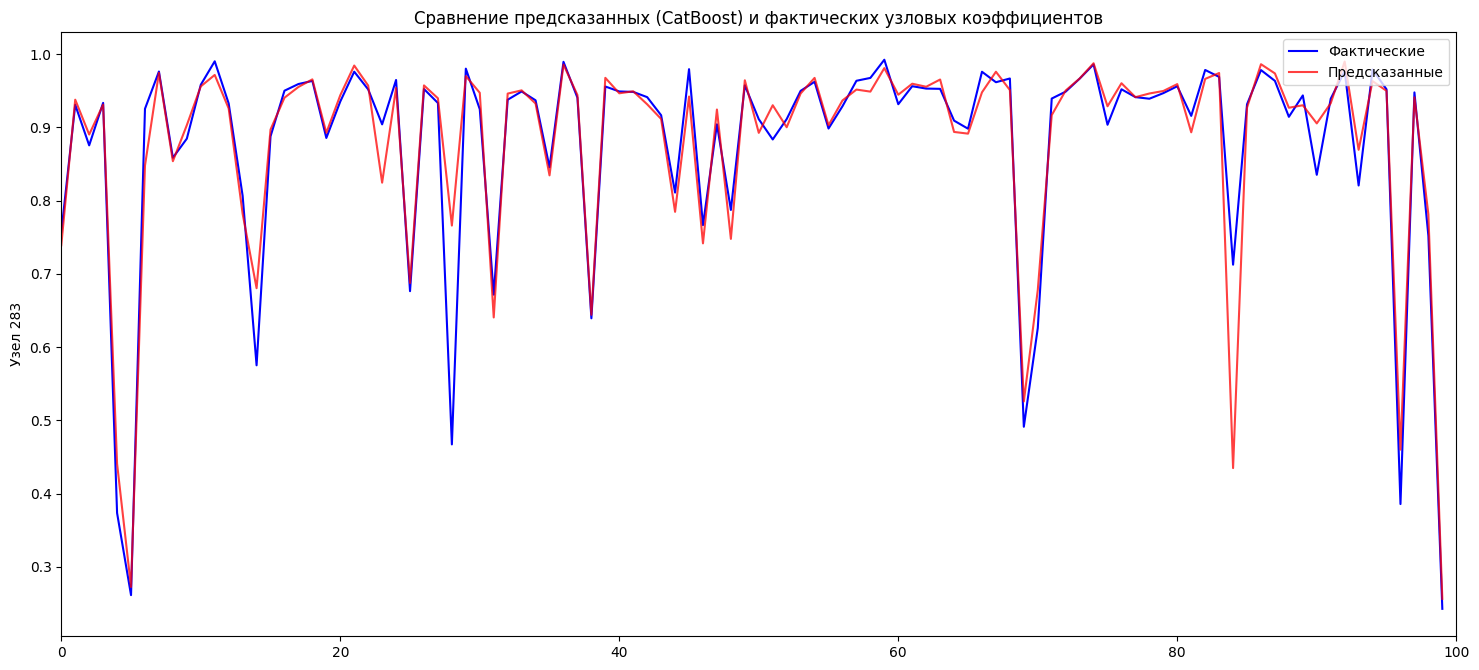

In [509]:
fig, axes = plt.subplots(figsize=(18,8), dpi=100)

g=sns.lineplot(data=np.array(y_test['Узел 283'][:100]), color='blue', label='Фактические')
sns.lineplot(data=np.array(y_predicted[:100,0]), color='Red', alpha=0.75, label='Предсказанные')
g.set_ylabel('Узел 283')
plt.legend(loc='upper right')
plt.title('Сравнение предсказанных (CatBoost) и фактических узловых коэффициентов')

plt.xlim(0,100)
plt.show()